---
title: Predicting House Prices using Machine Learning
author: "Iván de Luna-Aldape"
date: "3/1/2025"
categories:
    - machine-learning
    - tutorial
freeze: true
---

### 1. Introduction
### Predicting House Prices using Machine Learning

In this project, we'll build a machine learning model to predict house prices based on features like square footage, number of bedrooms, location, and more. Predicting house prices is a classic regression problem in data science, and it’s a great way to showcase skills in data cleaning, exploratory data analysis (EDA), feature engineering, and model building.

We’ll use the [Kaggle House Prices dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data), which contains 79 features describing various aspects of residential homes. Our goal is to predict the `SalePrice` column, which represents the final sale price of each home.

By the end of this project, you’ll have a clear understanding of how to:
- Clean and preprocess a real-world dataset.
- Perform exploratory data analysis to uncover insights.
- Build and evaluate a machine learning model.

### 2. Import Libraries

Before we start, we need to import the necessary Python libraries. These libraries will help us load, clean, analyze, and model the data. Here’s a quick overview of what each library does:

- **Pandas**: For data manipulation and analysis.
- **NumPy**: For numerical computations.
- **Matplotlib** and **Seaborn**: For data visualization.
- **Scikit-Learn**: For machine learning tasks like splitting data, training models, and evaluating performance.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### 3. Load and Explore the dataset

The first step in any data science project is to load the dataset and understand its structure. We’ll use Pandas to load the dataset into a DataFrame, which is a tabular data structure that makes it easy to manipulate and analyze data.

Let’s load the dataset and take a look at the first few rows using the `.head()` method. This will give us a quick glimpse of the data, including the column names and some sample values.

We’ll also use `.info()` to get a summary of the dataset, including the number of rows, columns, and data types. This is important because it helps us identify any missing values or columns that might need special handling.

Finally, we’ll use `.describe()` to get summary statistics for the numerical columns, such as mean, standard deviation, and quartiles. This gives us a sense of the distribution of the data and helps us spot potential outliers.

In [7]:
# Load the train.csv part of the dataset
data = pd.read_csv('./house-prices-data/train.csv')

# Display the first 5 rows
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
# Get a summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 247 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(35), uint8(209)
memory usage: 731.6 KB


In [14]:
# Get summary statistics of the dataset
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,0.003425,0.003425,0.083562,0.002055,0.867808,0.002740,0.008219,0.013699,0.820548,0.085616
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,0.058440,0.058440,0.276824,0.045299,0.338815,0.052289,0.090317,0.116277,0.383862,0.279893
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 4. Data Cleaning

Real-world datasets are rarely clean and ready for analysis. In this step, we’ll handle missing values, outliers, and any other issues that could affect our model’s performance.

First, we’ll check for missing values using a heatmap. This visualization makes it easy to see which columns have missing data and how widespread the issue is. Depending on the number of missing values, we might choose to fill them (e.g., with the median for numerical columns) or drop them entirely.

We’ll also look for outliers, which are extreme values that can skew our analysis. For example, a house with an unusually high price might be an outlier. We can use boxplots or scatter plots to identify these values and decide how to handle them.

By the end of this step, our dataset will be clean and ready for analysis.

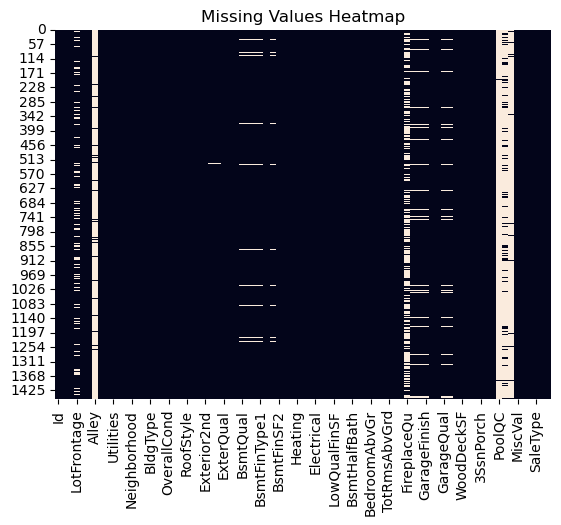

/var/folders/dp/hjbpmxsx7797vz0btvv75yh00000gn/T/ipykernel_21969/2750248851.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.median(), inplace=True)


In [8]:
# Check for missing values
sns.heatmap(data.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

# Fill missing values
data.fillna(data.median(), inplace=True)

### 5. Exploratory Data Analysis (EDA)

Now that our data is clean, we’ll dive into exploratory data analysis (EDA). The goal of EDA is to uncover patterns, relationships, and insights in the data that can inform our modeling decisions.

We’ll start by visualizing the relationship between the target variable (`SalePrice`) and key features like square footage (`GrLivArea`), number of bedrooms (`BedroomAbvGr`), and location (`Neighborhood`). Scatter plots and bar charts are great tools for this.

We’ll also look at the correlation between numerical features using a correlation matrix. This helps us identify which features are most strongly related to the target variable and which features might be redundant.

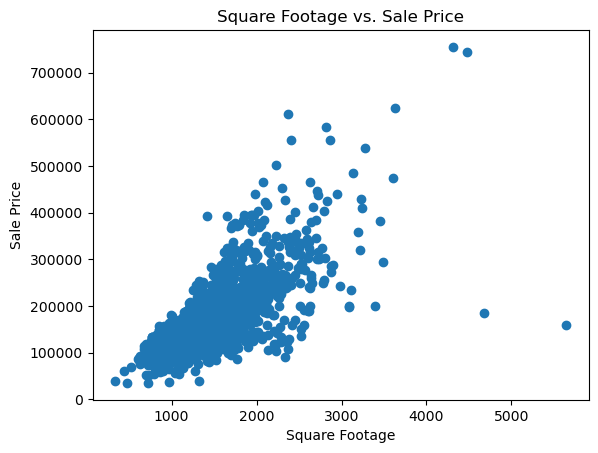

In [9]:
# Scatter plot of Square Footage vs. Price
plt.scatter(data['GrLivArea'], data['SalePrice'])
plt.xlabel('Square Footage')
plt.ylabel('Sale Price')
plt.title('Square Footage vs. Sale Price')
plt.show()

### 6. Feature Engineering

Feature engineering is the process of creating new features or transforming existing ones to improve our model’s performance. In this step, we’ll:

1. **Encode Categorical Variables**: Machine learning models can’t process text data directly, so we’ll convert categorical variables like `Neighborhood` into numerical values using one-hot encoding.

2. **Create New Features**: Sometimes, combining existing features can lead to better predictions. For example, we might create a new feature like `PricePerSqFt` by dividing the sale price by the square footage.

3. **Scale Numerical Features**: Some models perform better when numerical features are scaled to a similar range. We’ll use techniques like standardization or normalization to achieve this.

By the end of this step, our dataset will be ready for modeling.

In [10]:
# One-hot encode categorical variables
data = pd.get_dummies(data, drop_first=True)

### 7. Model Building

Now it’s time to build our machine learning model! We’ll start by splitting the data into training and testing sets. The training set will be used to train the model, while the testing set will be used to evaluate its performance.

We’ll use a simple Linear Regression model as our starting point. Linear Regression is a good choice for this problem because it’s easy to interpret and works well when there’s a linear relationship between the features and the target variable.

After training the model, we’ll make predictions on the test set and evaluate its performance using metrics like Root Mean Squared Error (RMSE). RMSE tells us how far off our predictions are, on average, from the actual values.

By the end of this step, we’ll have a working model and a sense of how well it performs.

In [11]:
# Split the data
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 49204.92499243692


### 8. Results and Visualizations

In this step, we’ll visualize the results of our model to see how well it’s performing. We’ll create a scatter plot of the actual vs. predicted house prices. If the model is performing well, the points should fall close to a diagonal line.

We’ll also analyze the residuals, which are the differences between the actual and predicted values. A good model will have residuals that are randomly distributed around zero, with no clear patterns.

Finally, we’ll discuss the model’s strengths and weaknesses. For example, does it perform well for certain types of houses but struggle with others? Are there any features that seem particularly important or unimportant?

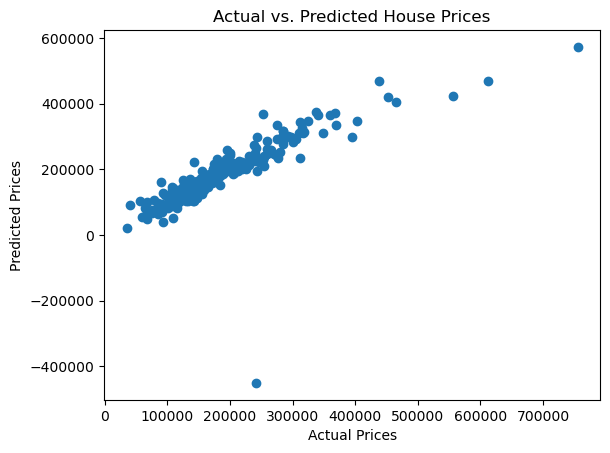

In [12]:
# Plot predictions vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.show()

### 9. Conclusion

While our model performed reasonably well, there’s always room for improvement. 

Next steps could include:
- Trying more advanced models like Random Forests or Gradient Boosting.
- Incorporating additional features or external data sources.
- Fine-tuning the model’s hyperparameters to improve performance.